In [1]:
#import necessary packages :

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud 

import warnings
import string
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
#nltk.download('stopwords')


warnings.filterwarnings('ignore')

In [ ]:
#Read the dataset : 

train_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [ ]:
train_dataset.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


###Observations:
  1. We can see that the comments are classified into 5 different categories. 
  2. There are no null values present.
  3. We will not make use of Id column.

# Data Analysis : 

Text(0.5, 1.0, 'Correlation between toxicity of comments: ')

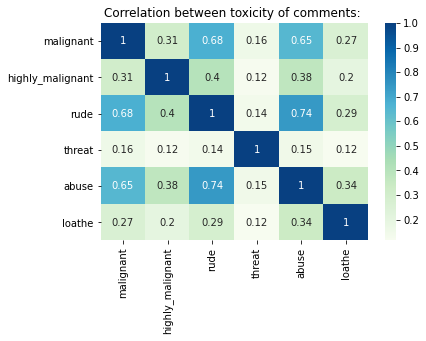

In [4]:
sns.heatmap(train_dataset.corr(),annot=True,cmap='GnBu')
plt.title("Correlation between toxicity of comments: ")

### Observations : 
  1. We can see that if a comment is classified as malignant, then there is a possibility that, the comment may be rude as well as abusive.
  2. Rude and Abuse are also highly corrleated.

In [7]:
comment_types = ['malignant','highly_malignant','rude','threat','abuse','loathe']
data = train_dataset[comment_types].sum().to_frame().rename(columns={0:'count'})
data

fig = px.pie(data,values='count',names=comment_types,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="Distribution of comment's toxicity : ")
fig.show()


  * Approximately 44% of the comments are considered as malginant, followed by 24.1%.

###Word cloud representations of loud words categorised into various categories :

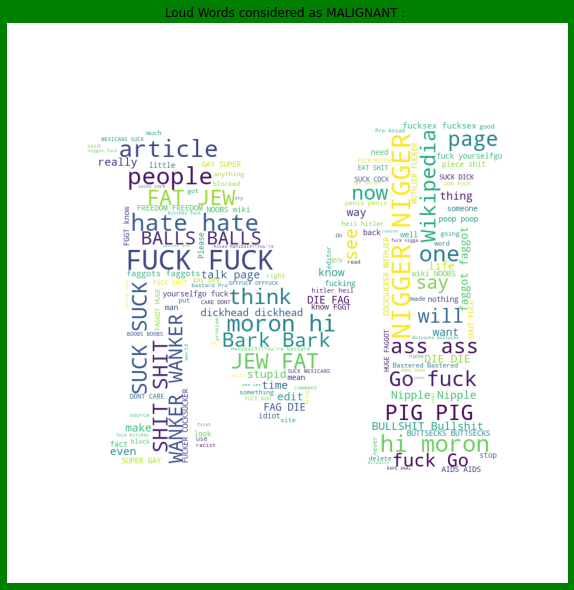

In [ ]:
malignant_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/M.jpg'))
text =  train_dataset['comment_text'][train_dataset['malignant']==1]

wordcloud = WordCloud(background_color='white', #  the background color is white 
                      height=400, #  the height is set to 400 
                      width=800, #  set the width to 800 
                      max_words = 150,
                      mask=malignant_mask #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[25, 8], facecolor='g')
plt.title("Loud Words considered as MALIGNANT : ")
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
#save it locally 
#plt.savefig(‘ figure 8. jpg’, dpi=600, bbox_inches=‘tight’, quality=95)
plt.show()

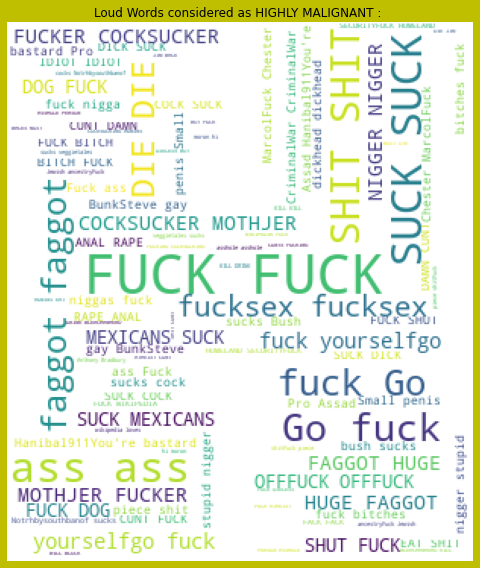

In [ ]:
highly_malignant_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/H.jpg'))
text =  train_dataset['comment_text'][train_dataset['highly_malignant']==1]

wordcloud = WordCloud(background_color='white', #  the background color is white 
                      height=100, #  the height is set to 400 
                      width=400, #  set the width to 800 
                      max_words = 100,
                      mask=highly_malignant_mask #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[30, 8], facecolor='y')
plt.title("Loud Words considered as HIGHLY MALIGNANT : ")

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
#save it locally 
#plt.savefig(‘ figure 8. jpg’, dpi=600, bbox_inches=‘tight’, quality=95)
plt.show()

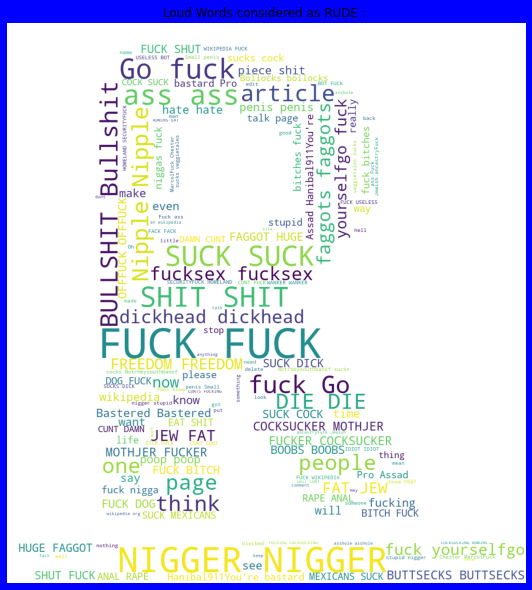

In [ ]:

rude_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/R.jpg'))
text =  train_dataset['comment_text'][train_dataset['rude']==1]

wordcloud = WordCloud(background_color='white', #  the background color is white 
                      height=400, #  the height is set to 400 
                      width=800, #  set the width to 800 
                      max_words = 150,
                      mask=rude_mask #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[25, 8], facecolor='b')
plt.title("Loud Words considered as RUDE : ")

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
#save it locally 
#plt.savefig(‘ figure 8. jpg’, dpi=600, bbox_inches=‘tight’, quality=95)
plt.show()

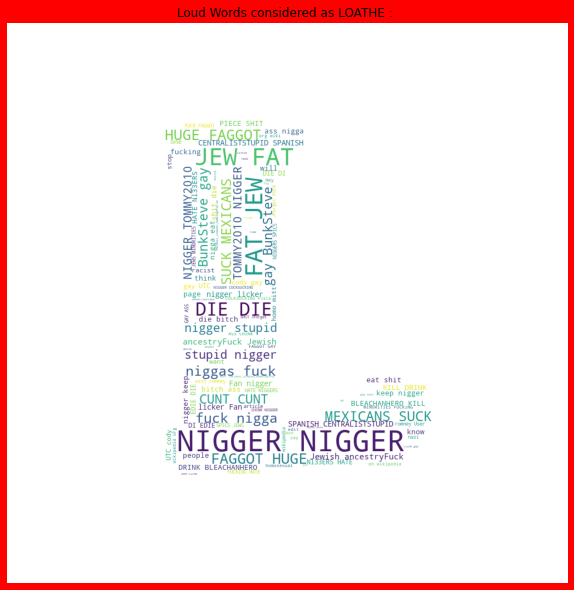

In [ ]:

loathe_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/L.jpg'))
text =  train_dataset['comment_text'][train_dataset['loathe']==1]

wordcloud = WordCloud(background_color='white', #  the background color is white 
                      height=400, #  the height is set to 400 
                      width=800, #  set the width to 800 
                      max_words = 100,
                      mask=loathe_mask #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[25, 8], facecolor='r')
plt.title("Loud Words considered as LOATHE : ")

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
#save it locally 
#plt.savefig(‘ figure 8. jpg’, dpi=600, bbox_inches=‘tight’, quality=95)
plt.show()

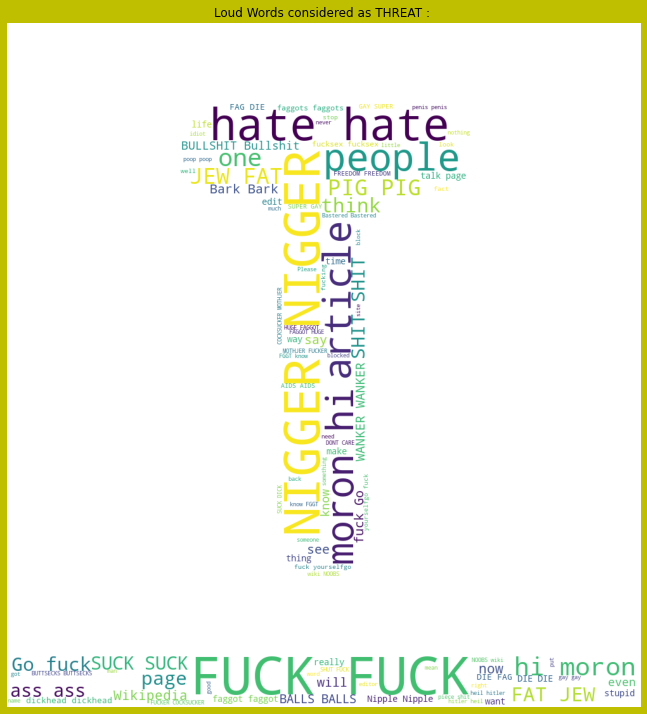

In [ ]:
threat_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/T.jpg'))
text =  train_dataset['comment_text'][train_dataset['malignant']==1]

wordcloud = WordCloud(background_color='white', #  the background color is white 
                      height=400, #  the height is set to 400 
                      width=1000, #  set the width to 800 
                      max_words = 100,
                      mask=threat_mask #  add a mask 
                     ).generate(' '.join(text))
plt.figure(figsize=[30, 10], facecolor='y')
plt.title("Loud Words considered as THREAT : ")
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=1)
#save it locally 
#plt.savefig(‘ figure 8. jpg’, dpi=600, bbox_inches=‘tight’, quality=95)
plt.show()

### Feature Generation : 

In [8]:
nltk.download('stopwords')

data = train_dataset[['id','comment_text']]
stop_words = list(set(stopwords.words('english')))
punctuation = string.punctuation

data['char_count'] = data['comment_text'].apply(len)
data['word_count'] = data['comment_text'].apply(lambda x: len(x.split()))
data['punctuation_count'] = data['comment_text'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
data['upper_case_word_count'] = data['comment_text'].apply(lambda x: len([word for word in x.split() if word.isupper()]))
data['stopword_count'] = data['comment_text'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,comment_text,char_count,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,264,43,6.000000,10,2,18
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,112,17,6.222222,12,1,2
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",233,42,5.418605,6,0,20
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",622,113,5.456140,21,5,56
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",67,13,4.785714,5,0,5
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",295,47,6.145833,18,0,19
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,99,18,5.210526,4,0,11
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",81,12,6.230769,4,0,2
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,116,25,4.461538,1,1,15


In [9]:
data.describe()

,char_count,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,394.138847,67.272518,5.666717,15.885656,2.974482,30.200237
std,590.725381,99.231355,5.911611,36.649722,21.207614,45.296458
min,5.000000,1.000000,1.769231,0.000000,0.000000,0.000000
25%,96.000000,17.000000,5.113636,4.000000,0.000000,7.000000
50%,205.000000,36.000000,5.537037,8.000000,1.000000,16.000000
75%,436.000000,75.000000,5.936170,17.000000,3.000000,35.000000
max,5000.000000,1411.000000,1242.250000,4942.000000,1352.000000,902.000000


  * Maximum characters in a sentence is of about 5000 characters and minimum is 5 characters in a comment.
  * Word counts range from 1 to 1411 in a sentence.
  * Maximum stop words used in a sentence is of about 902 stop words.

# Data Cleaning

In [ ]:
def data_cleaning(text):
  text = text.lower()
  text = re.sub(r'\n',' ',text)
  text = re.sub(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress',text)
  text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress',text)
  text = re.sub(r'\d+(\.\d+)?', 'number',text)
  text = re.sub(r'£|\$', 'dollars',text)
  text = re.sub(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber',text)
  text = text.translate(str.maketrans('','',string.punctuation))
  text = re.sub(r'nbsp',' ',text)
  #text = [ps.stem(word) for word in text if not word in stopwords.words('english')]

  return text

train_dataset['comment_text'] = train_dataset['comment_text'].apply(data_cleaning)

In [ ]:
train_dataset['comment_text'] = train_dataset['comment_text'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

# Model Building : 

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM, Dropout, Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split

###Tokenization : 

In [10]:
#Maximum number of frequent words to be used :
MAX_FREQUENT_WORDS = 100000 

tokenizer = Tokenizer(num_words = MAX_FREQUENT_WORDS,
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', 
                      lower=True,
                      oov_token = '<oov>')
tokenizer.fit_on_texts(train_dataset.comment_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 237747 unique tokens.


In [11]:
#conversion of text data into sequence of vectors:
X = tokenizer.texts_to_sequences(train_dataset.comment_text)

max_len = max([len(x) for x in np.array(X)])

#shorter sentences are made as long as the others by filling the shortfall by zeros
X = pad_sequences(X,maxlen=max_len, dtype = 'int32', padding = 'pre', truncating = 'pre')
print("Shape of data tensor : ", X.shape)
y = train_dataset.iloc[:,2:]
print("Shape of label tensor : ", y.shape)


Shape of data tensor :  (159571, 1250)
Shape of label tensor :  (159571, 6)


### Feauture Selection : 

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 30)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(127656, 1250) (127656, 6)
(31915, 1250) (31915, 6)


In [15]:
model = Sequential()
model.add(Embedding(len(word_index)+1,300, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Conv1D(filters=128,kernel_size=3,padding='valid',kernel_initializer = 'glorot_uniform'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(6,activation='sigmoid'))
print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC','Recall','Precision'])
history = model.fit(x=x_train, y=y_train, epochs=2, batch_size=200, validation_data=(x_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1250, 300)         71324400  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1250, 256)         439296    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1248, 128)         98432     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'auc', 'recall', 'precision', 'val_loss', 'val_auc', 'val_recall', 'val_precision'])


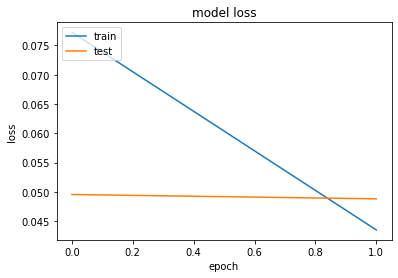

In [16]:
#Log-loss : 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

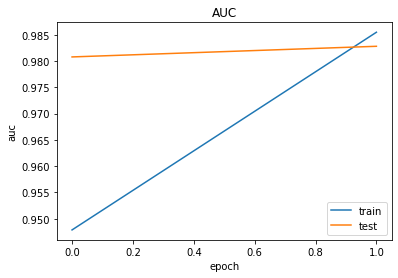

In [19]:
#AUC : 
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='bottom right')
plt.show()

In [ ]:
#Data Cleansing for testing dataset : 

test_dataset['comment_text'] = test_dataset['comment_text'].apply(data_cleaning)
test_dataset['comment_text'] = test_dataset['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

test_sequences = tokenizer.texts_to_sequences(test_dataset.comment_text)
test_padding = pad_sequences(test_sequences,maxlen=max_len, dtype = 'int32', padding = 'pre', truncating = 'pre')

predicted = model.predict(test_padding,batch_size=128)

In [20]:
test_dataset['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [23]:
predicted[0]

array([0.9866045 , 0.28790197, 0.9510091 , 0.03174382, 0.8610625 ,
       0.22551323], dtype=float32)

In [24]:
#use the model to predict on the test dataset and create a final dataframe
predict = np.hstack((test_dataset.comment_text[:,np.newaxis],predicted))

final_df = pd.DataFrame(predict,columns=['comment_text','malignant','highly_malignant','rude','threat','abuse','loathe'])
final_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,yo bitch ja rule succesful youll ever whats ha...,0.986605,0.287902,0.951009,0.0317438,0.861063,0.225513
1,rfc title fine imo,0.000288479,1.2757e-06,1.95057e-05,1.10879e-05,1.16036e-05,2.1063e-05
2,sources zawe ashton lapland —,0.123773,0.000938575,0.0135299,0.0018993,0.0176859,0.00559136
3,look back source information updated correct f...,0.000763001,7.9002e-07,3.92846e-05,1.80957e-05,1.86744e-05,1.47663e-05
4,dont anonymously edit articles,0.0045006,1.76541e-05,0.000232254,0.000109605,0.000216768,0.000186474
...,...,...,...,...,...,...,...
153159,totally agree stuff nothing toolongcrap,0.0457648,8.6807e-05,0.00284247,0.000356531,0.00325801,0.000737007
153160,throw field home plate get faster throwing cut...,0.0739226,0.000282993,0.0029705,0.00207775,0.0054812,0.00364561
153161,okinotorishima categories see changes agree co...,0.00133114,2.2592e-06,0.000134584,1.82938e-05,4.11726e-05,2.99997e-05
153162,one founding nations eu germany law return qui...,0.00122206,1.26813e-06,8.28544e-05,5.16255e-05,3.4105e-05,3.53353e-05


In [25]:
#save the final output to csv
final_df.to_csv('Predicted Comments')